# Experiments recreating “23 ecke” by Georg Nees

In support of a [blog post](https://zellyn.com/2024/07/23-ecke/).

In [1]:
from dataclasses import dataclass
import math
import random
import types

import drawsvg as draw

## Helper methods

By implementing helper methods, we get to keep the main code as similar as possible.

* the random generators (`J1` and `J2`) were converted to functions
* the `x` and `y` parameters were reversed to mimic the typical orientation

In [2]:
class Random:
    def __init__(self, seed, mod=1<<31):
        self.seed = seed
        self.mod = mod

    def next(self, JA, JE):
        self.seed = (self.seed * 5) % self.mod
        return self.seed / self.mod * (JE-JA) + JA

In [3]:
# Common seeds from book
JS1 = 1306859721
JS2 = 1485627309
JS3 = 1649173265
JS4 = 1805297143
JS5 = 1973195467
JS6 = 2013911545

# From famous version of “Schotter”
JS7 = 1922110153
JS8 = 1769133315

In [4]:
# “empty” means “leer” in German. This is `MoveTo`
X = Y = 0
def LEER(x,y):
    global p
    if p is not None:
        g.append(p)
    p = draw.Path()
    p.M(y,x)
    X = x
    Y = y

def LINE(x,y):
    p.L(y,x)
    x = X
    y = Y

def CLOSE():
    if p is not None:
        g.append(p)
        d.append(g)

r1 = Random(JS5)
r2 = Random(JS3)

JE1 = JA1 = JE2 = JA2 = 0
def J1():
    return r1.next(JA1, JE1)
def J2():
    return r2.next(JA2, JE2)

def SIN(x):
    return math.sin(x)
def COS(x):
    return math.cos(x)

In [5]:
def SERIE(QUER, HOCH, XMAL, YMAL, FIGUR):
  global P, Q

  P = -QUER * XMAL * 0.5
  Q = YANF = -HOCH * YMAL * 0.5

  for COUNTX in range(1, XMAL+1):
    Q = YANF
    for COUNTY in range(1, YMAL+1):
      FIGUR()
      Q = Q + HOCH
    P = P + QUER
  LEER(-148.0, -105.0)
  CLOSE()

## Code from the thesis

## Elirr

```
1 'PROCEDURE'ELIRR.,
2 'BEGIN'
3 JA1.=P+JLI.,JE1.=P+JRE.,
4 JA2.=Q+JUN.,JE2.=Q+JOB.,
5 P1.=J1.,Q1.=J2.,
6 LEER(P1,Q1).,
7 'FOR'M.=1'STEP'1'UNTIL'N'DO'
8 'IF'T'EQUAL'0'THEN'
9 'BEGIN'
10 LINE(J1,Y)., LINE(X,J2)
11 'END'
12 'ELSE'LINE(J1,J2).,
13 'IF'T'EQUAL'0'THEN'
14 'BEGIN'
15 LINE(P1,Y).,LINE(X,Q1)
16 'END'
17 'ELSE'LINE(P1,Q1)
18 'END'ELIRR,,
```

In [6]:
P = Q = JE1 = JA1 = JE2 = JA2 = 0
JLI = JRE = JUN = JOB = N = 0
T = 0

def ELIRR():
    global P, Q
    global JE1, JA1, JE2, JA2
    JA1 = P + JLI
    JE1 = P + JRE
    JA2 = Q + JUN
    JE2 = Q + JOB
    P1 = J1()
    Q1 = J2()
    LEER(P1,Q1)
    for M in range(1, N+1):
        if T == 0:
            LINE(J1(), Y)
            LINE(X, J2())
        else:
            LINE(J1(), J2())
    if T == 0:
        LINE(P1, Y)
        LINE(X, Q1)
    else:
        LINE(P1, Q1)    

In [7]:
def DRAW_FIGURES(squared=True):
    global JI1, JI2, N, JLI, JRE, JUN, JOB, T
    JI1 = JS1
    JI2 = JS2
    N = 20
    JLI = 0
    JRE = 20
    JUN = 0
    JOB = 20
    if squared:
        T = 0
    else:
        T = 1
    SERIE(20, 20, 8, 6, ELIRR)    

In [8]:
d = draw.Drawing(180, 280, origin='center', style="background-color:#eae6e2")
g = draw.Group(stroke='#41403a', stroke_width='0.4', fill='none', stroke_linecap="round", stroke_linejoin="round")
p = None
DRAW_FIGURES(True)

## A beautiful accident

Clearly that transliteration into Python was wrong.

However, I found the image below so delicious, I couldn't bring myself to change it.

Instead, I fixed the errors in the more pythonic version below.

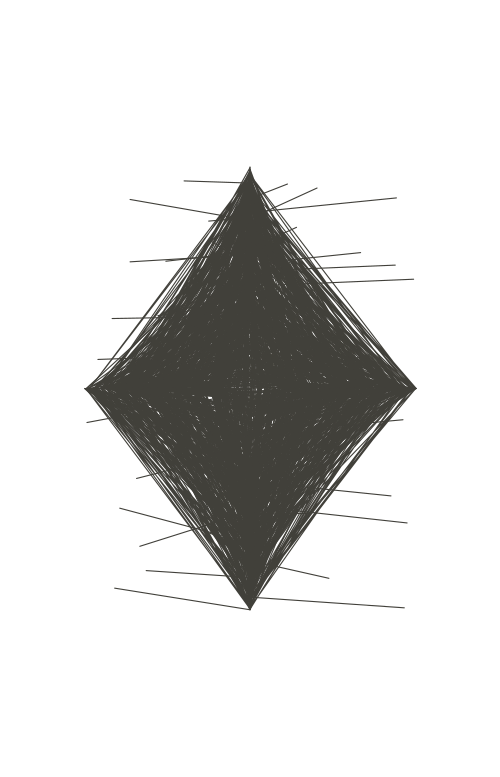

In [9]:
d.set_render_size(w=500)

## Slightly more Pythonic version

I've tidied up this notebook, but this function got hacked up a _lot_, as the many keyword arguments attest. It used to have more 😂

In [10]:
def draw_figures(QUER, HOCH, XMAL, YMAL, inset, N, S1, S2, diag=False, stroke_width=0.3, svg_width=160, svg_height=200, swizzle=True, generators=2, mod=1<<31):
    if swizzle:
        rotate = 180
    else:
        rotate = 0

    def L(p, x, y):
        if swizzle:
            p.L(y, x)
        else:
            p.L(x, -y)
    def M(p, x, y):
        if swizzle:
            p.M(y, x)
        else:
            p.M(x, -y)
    
    JLI = inset / 2
    JRE = QUER - inset / 2
    JUN = inset / 2
    JOB = HOCH - inset / 2
    x = y = 0
    
    r1 = Random(S1, mod=mod)
    r2 = Random(S2, mod=mod)
    if generators == 1:
        r2 = r1

    d = draw.Drawing(svg_width, svg_height, origin='center', style="background-color:#eae6e2")
    g = draw.Group(transform=f"rotate({rotate})", stroke='#41403a', stroke_width=f'{stroke_width}', fill='none', stroke_linecap="round", stroke_linejoin="round")
    p = [None]

    def serie(QUER, HOCH, XMAL, YMAL, FIGUR):
      P = -QUER * XMAL * 0.5
      Q = YANF = -HOCH * YMAL * 0.5
    
      for COUNTX in range(1, XMAL+1):
        Q = YANF
        for COUNTY in range(1, YMAL+1):
          p[0] = draw.Path()
          FIGUR(P, Q, p[0])
          g.append(p[0])
          Q = Q + HOCH
        P = P + QUER

    def elirr(P, Q, p):
        JA1 = P + JLI
        JE1 = P + JRE
        JA2 = Q + JUN
        JE2 = Q + JOB
        P1 = r1.next(JA1, JE1)
        Q1 = r2.next(JA2, JE2)
        M(p, P1, Q1)
        X, Y = P1, Q1
        for _ in range(1, N+1):
            X = r1.next(JA1, JE1) + 0.3 * random.random()
            L(p, X, Y)
            Y = r2.next(JA2, JE2) + 0.3 * random.random()
            L(p, X, Y)
        if diag:
            L(p, P1, Q1)
            
        else:
            L(p, P1, Y)
            X = P1
            L(p, X, Q1)

    serie(QUER, HOCH, XMAL, YMAL, elirr)

    print()
    d.append(g)
    return d

## The image from the thesis

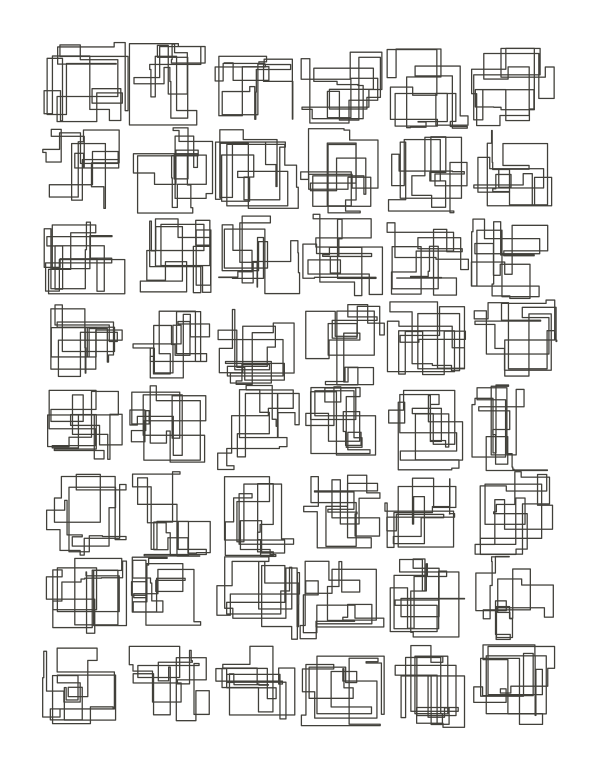

In [11]:
svg = draw_figures(20, 20, 8, 6, 0, 20, JS2, JS5, stroke_width=0.3, swizzle=True, svg_width=140, svg_height=180)
svg.set_render_size(w=600)

# _23 ecke_

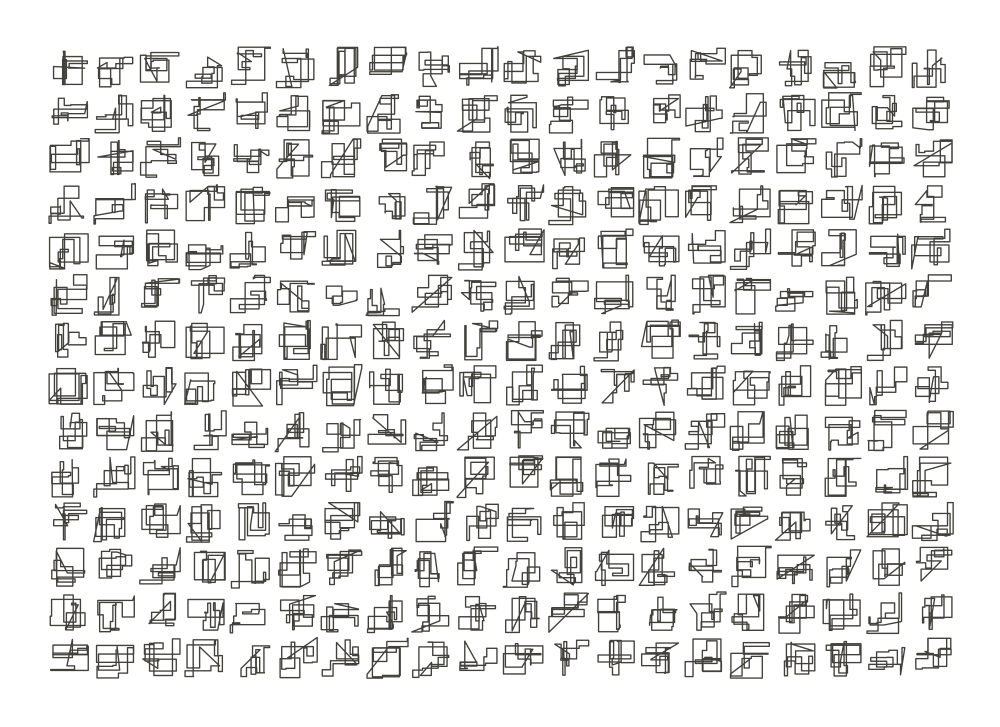

In [13]:
svg = draw_figures(10, 10, 20, 14, 1, 11, 314748365, JS5, diag=True, stroke_width=0.3, svg_width=220, svg_height=160, swizzle=False, generators=1, mod=1<<30)
svg.set_render_size(w=1000)